# Convolutional Neural Network (CNN)

In this we are going to use CNN to classify handwritten numbers.

## Importing, Preparing and Visualizing Data

Train labels {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Test labels {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


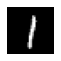

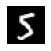

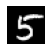

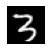

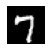

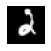

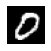

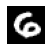

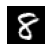

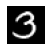

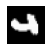

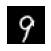

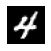

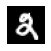

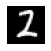

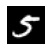

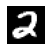

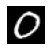

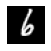

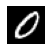

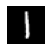

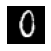

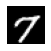

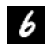

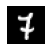

In [1]:
import os
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"]="true"

from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()


import matplotlib.pyplot as plt
import numpy as np
# Count the number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print("Train labels", dict(zip(unique, counts)))

# Count the number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print("Test labels", dict(zip(unique, counts)))

# Sample from train data set
indexes = np.random.randint(0, x_train.shape[0], size = 25)

images = x_train[indexes]
labels = y_train[indexes]

plt.figure(figsize=(5,5))

for i in range (len(indexes)):
    plt.subplot(5, 5, i+1)
    image = images[i]
    plt.imshow(image, cmap = "gray")
    plt.axis("off")
    plt.show()
    plt.close("all")

In [2]:
import numpy as np
num_labels = len(np.unique(y_train))

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

image_size = x_train.shape[1]
print(image_size)
x_train = np.reshape(x_train, [-1, image_size, image_size, 1]).astype("float32")/255
x_test = np.reshape(x_test, [-1, image_size, image_size, 1]).astype("float32")/255

# Network Parameter
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2

28


## Building model and Training it

In [3]:
from tensorflow.keras.models import Sequential
model = Sequential()

from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation
model.add(Conv2D(filters = filters, kernel_size = kernel_size,
                 activation="relu", input_shape = input_shape))
model.add(MaxPool2D(pool_size = pool_size))

model.add(Conv2D(filters = filters, kernel_size = kernel_size,
                 activation="relu"))
model.add(MaxPool2D(pool_size = pool_size))

model.add(Conv2D(filters = filters, kernel_size = kernel_size,
                 activation="relu"))
model.add(MaxPool2D(pool_size = pool_size))

model.add(Flatten())
model.add(Dropout(dropout))

model.add(Dense(num_labels))
model.add(Activation("softmax"))
model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.fit(x_train, y_train, epochs=20 ,batch_size= batch_size, validation_data=(x_test, y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)                0

## Visualizing loss and val loss

Note: It shows that if model is overfitting or not.
      If val_loss line is making "U" or went far upward than loss it means the model is overfitting.

<AxesSubplot:>

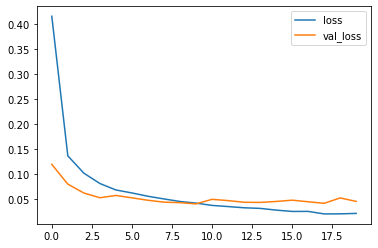

In [4]:
import pandas as pd
history = pd.DataFrame(model.history.history)
history[["loss", "val_loss"]].plot()

## Prediction

3

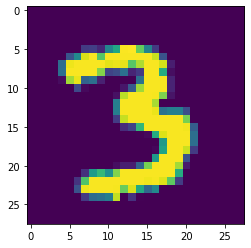

In [5]:
my_number = x_test[500]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1, image_size, image_size ,1)))

6

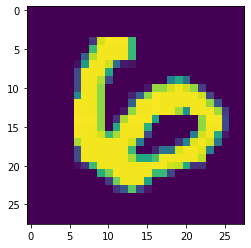

In [6]:
my_number = x_train[9000]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1, image_size, image_size ,1)))

5

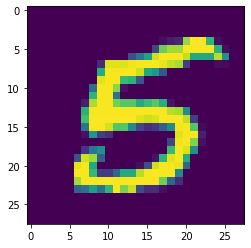

In [7]:
my_number = x_train[20000]
plt.imshow(my_number.reshape(28,28))
np.argmax(model.predict(my_number.reshape(-1, image_size, image_size ,1)))